In [ ]:
import yfinance as yf 
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np
from pylab import *
import datetime
#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#define csv output
output_data = ('../df_csv/us_df.csv')

In [4]:
# Create list of all companies we want records for. 
US_Stock_list = ['CMG']

# Set Range we want to records from. 
start = datetime.date(2000,12,2) 
end = datetime.date(2020,12,3)


# Loop through records for all ticker symbols in our list.
for stock in US_Stock_list:
     globals()[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
CMG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3.740000e+03
mean,380.291808,385.085714,375.465934,380.408540,380.408540,7.289950e+05
std,278.869154,281.908212,275.531241,278.871782,278.871782,6.920567e+05
min,39.410000,40.000000,36.860001,38.689999,38.689999,3.310000e+04
25%,113.619997,115.337500,111.289999,113.619997,113.619997,3.731000e+05
50%,346.029999,351.030014,340.440002,346.089996,346.089996,5.655000e+05
75%,532.817490,536.860016,526.369995,532.092484,532.092484,8.444750e+05
max,1375.000000,1384.459961,1355.599976,1379.030029,1379.030029,1.321860e+07


In [7]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    CMG[label] = CMG['Adj Close'].rolling(window = avg, center = False).mean()
  

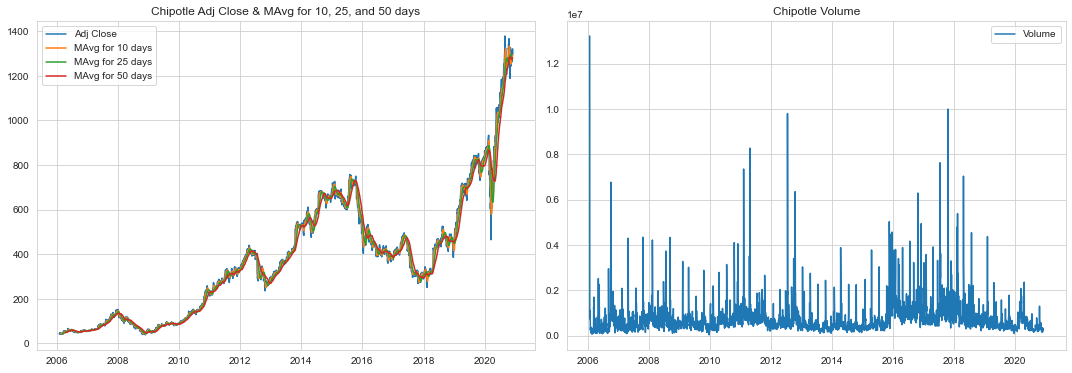

In [8]:
fig = plt.figure(figsize=(15,10))
t=CMG[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']]
u=CMG['Volume']
sub1 = fig.add_subplot(221) 
sub1.set_title('Chipotle Adj Close & MAvg for 10, 25, and 50 days') 
sub1.plot(t)
sub1.legend(['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days'])
sub2 = fig.add_subplot(222)
sub2.set_title('Chipotle Volume')
sub2.plot(u)
sub2.legend(['Volume'])
plt.tight_layout()
plt.show()

In [10]:
CMG['Daily Return'] = CMG['Adj Close'].pct_change()


In [11]:
stock_adjclose = yf.download(US_Stock_list,start,end)['Adj Close']
daily_return = stock_adjclose.pct_change()

[*********************100%***********************]  1 of 1 completed


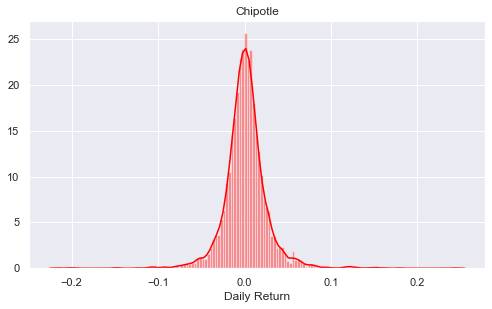

In [15]:
sns.set(rc={"figure.figsize": (18, 10)}); np.random.seed(0)
w = CMG['Daily Return']
subplot(2,2,1)
ax = sns.distplot(w.dropna(),bins=150,color='red')
plt.title("Chipotle")
plt.show()